<b>Введение</b>


Нам предстоит анализировать данные о продажах игр, оценки пользователей и экспертов, жанры и платформы для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 
Необходимо выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Для этого сначала рассмотрим имеющиеся данные, обработаем их, после чего проведем исследовательский анализ и рассмотрим различия пользователей по регионам. Также, чтобы ответить на вопросы бизнеса выдвенем и проверим гипотезы. 

<b>Импортируем все необходимые библиотеки</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

<b>Шаг 1. Откроем файл с данными и изучим общую информацию</b>

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В стоблцах name, Year_of_Release, Genre, Critic_Score, User_Score, Rating присутсвуют пропуски, на дальнейшем шаге обработаем их. Пропуски могли возникнуть из-за человеческой ошибки, если поля были необязательны. Также, на следующем шаге изменим тип данных в некоторых столбцах на более подходящий. 

<b>Шаг 2. Подготовка данных</b>

приведем названия столбцов к единому регистру для удобства дальнейшего анализа данных. 

In [5]:
data.columns = data.columns.map(str.lower) 
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь изменим тип данных в некоторых столбцах:
- year_of_release изменим на int32, поскольку год - это целое число и нам не нужен тип float, но из-за наличия пропусков мы не можем применить просто int
- critic_score тоже меняем на int32 по аналогичным причинам


In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int32')
data['critic_score'] = data['critic_score'].astype('Int32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int32  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(2), float64(4), object(5)
memory usage: 1.3+ MB


Теперь обработаем пропуски. В первом шаге мы выяснили, что они встречаются в стобцах year_of_release, genre, critic_score, user_score, rating. Посмотрим на их количество и процент пропусков относительно всего количества данных в столбце. 

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
(data.isna().sum())/len(data)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

В столбцах name и genre хранятся категориальные значения, которые лучше ничем не заменять. В них одинаковое количество пропусков, проверим, не из одной ли они строки. 

In [9]:
data[data['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Удалим эти строки, так как только они не имеют название и жанр. Скорее всего они возникли из-за технической ошибки. 

In [10]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски в столбце со значением года заполнять не будем, поскольку нельзя подобрать значение, которое не исказит дальнейший анализ. 

Скорее всего пропуски в столбцах critic_score, user_score, rating связаны с отсутствием таких данных по этим играм.
Их процент относительно всех данных в этих столбцах довольно большой, около половины в каждом, заполнение или избавление от них может существенно исказить анализ, оставляем эти пропуски без изменений. 

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропумков в столбце user_score встречается аббревиатура tbd, она расшифровывается как to be determined, что значит будет определено. Скорее всего они возникли из-за недостаточного количетво отзывов, чтобы выставить игре оценку пользователей. 
tbd означает, что оценки пока нет, что равно пропуску (NaN). Произведем замену.

In [12]:
data['user_score'] = data['user_score'].replace('tbd', float('nan'))
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Добавим столбец, в котором будут храниться суммарные продажи во всех регионах. 

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


Пропуски обработаны, тип данных и названия столбцов приведены в удобный вид, также добавлен столбец с подсчетом продаж со всех регионов, можем преходить к дальнейшему анализу. 

<b>Шаг 3. Исследовательский анализ данных</b>

Проверим сколько игр выпускалось в разные годы и определим, какой период времени выпуска нам стоит учитывать. 

In [14]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Text(0, 0.5, 'Количество игр')

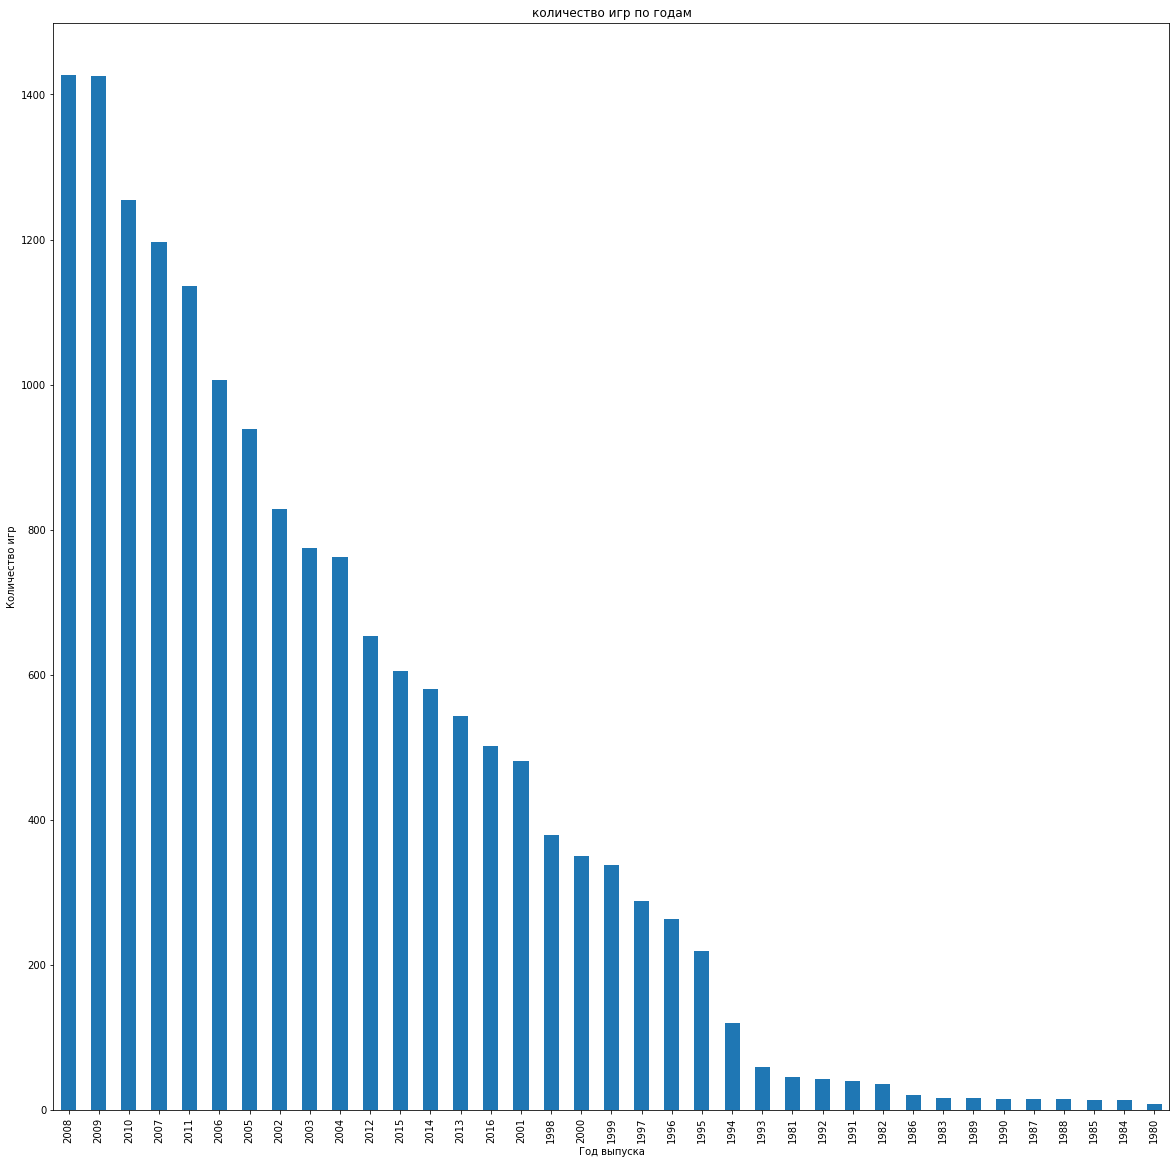

In [15]:
data['year_of_release'].value_counts().plot(kind='bar', title='количество игр по годам', figsize=(20,20))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

Нам не важны все периоды, поскольку в некоторые года данных слишком мало, а также прошло много времени и они могли устареть. Также 2016 год кажется подозрительным, данные за него могут быть не полными. 

Теперь изучим, как менялись продажи по платформам. 

In [16]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Платформы с наибольшими продажами это: PS2, X360, PS3, Wii, DS, PS- построим для них распределение по годам.  Продажи на других платформах уже сильно ниже. 

Text(0, 0.5, 'Продажи')

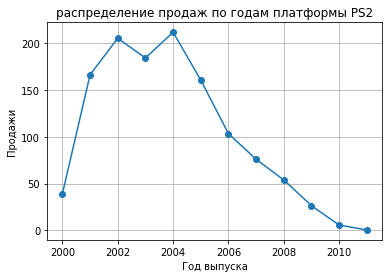

In [17]:
data.query('platform=="PS2"').groupby('year_of_release')['total_sales'].sum().plot(grid='True', title='распределение продаж по годам платформы PS2', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

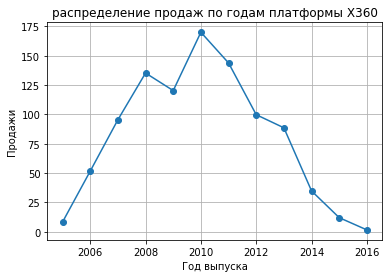

In [18]:
data.query('platform=="X360"').groupby('year_of_release')['total_sales'].sum().plot(grid='True', title='распределение продаж по годам платформы X360', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

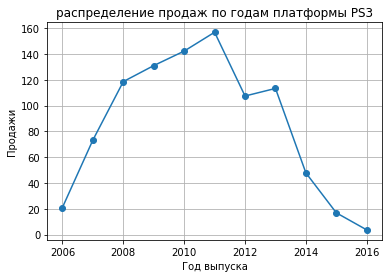

In [19]:
data.query('platform=="PS3"').groupby('year_of_release')['total_sales'].sum().plot(grid='True', title='распределение продаж по годам платформы PS3', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

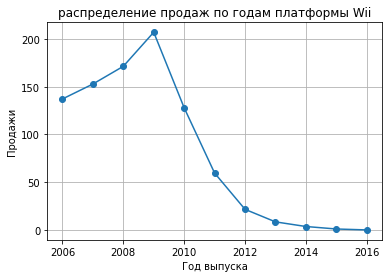

In [20]:
data.query('platform=="Wii"').groupby('year_of_release')['total_sales'].sum().plot(grid='True', title='распределение продаж по годам платформы Wii', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

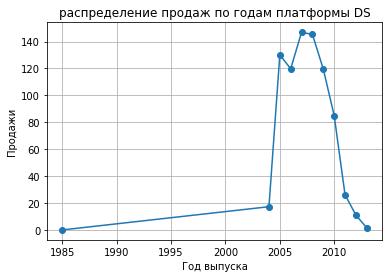

In [21]:
data.query('platform=="DS"').groupby('year_of_release')['total_sales'].sum().plot(grid='True', title='распределение продаж по годам платформы DS', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

Text(0, 0.5, 'Продажи')

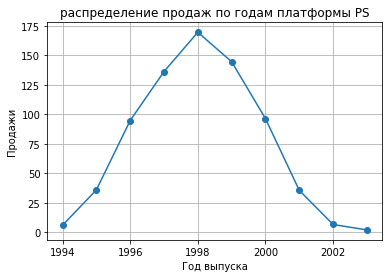

In [22]:
data.query('platform=="PS"').groupby('year_of_release')['total_sales'].sum().plot(grid='True', title='распределение продаж по годам платформы PS', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

<b>PS2</b>
- Игры выпускались с 2000 по 2012 года, т.е. 13 лет.
- Пик продаж приходится на 2002–2004 годы.

<b>X360</b>
- Игры выпускались с 2005 по 2015 года, т.е. 11 лет.
- Пик продаж приходится на 2007–2011 годы.

<b>PS3</b>
- Игры выпускались с 2006 по 2015 года, т.е. 10 лет.
- Пик продаж приходится на 2008–2012 годы.

<b>Wii</b>
- Игры выпускались с 2006 по 2013 года, т.е. 8 лет.
- Пик продаж приходится на 2006–2009 годы.

<b>DS</b>
- Игры выпускались с 2004 по 2012 года, т.е. 9 лет.
- Пик продаж приходится на 2005–2008 годы.

<b>PS</b>
- Игры выпускались с 1994 по 2003 года, т.е. 10 лет.
- Пик продаж приходится на 1997–1999 годы.

Из этого можем сделать вывод, что средняя продолжительность работы платформы состовляет 10 лет, а каждые 5-7 появляются новые. 

Актуальным периодом для построения прогноза на 2017 год являются 2011-2015 года. Он охватывает последние 4 года, в половину средней продолжительности работы платформы, а значит, именно платформы этих лет будут влиять на рынок в 2017 году. Также этот период содержит достаточное количество данных (около или больше 600 игр в каждом), 2016 не включаем из-за его неполноты. 

Выделим этот период и в дальнейшем будем работать именно с ним. 

In [23]:
data_actual = data.query('2010<year_of_release<2016')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60


Определим потенциально прибильны платформы, рассмотрев какие платформы лидируют по продажам, растут или падают. 

In [24]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     441.97
X360    378.86
PS4     244.89
3DS     242.67
XOne    133.17
Wii      94.84
PC       92.43
WiiU     77.59
PSV      49.56
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64

Text(0, 0.5, 'Суммарные продажи')

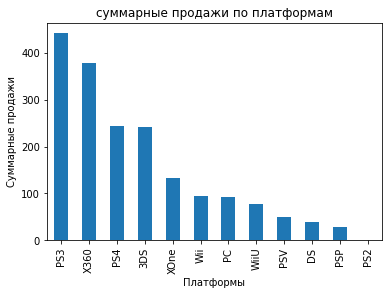

In [25]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', title='суммарные продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')

Лидером продаж является X360, а худший показатель у DC. 

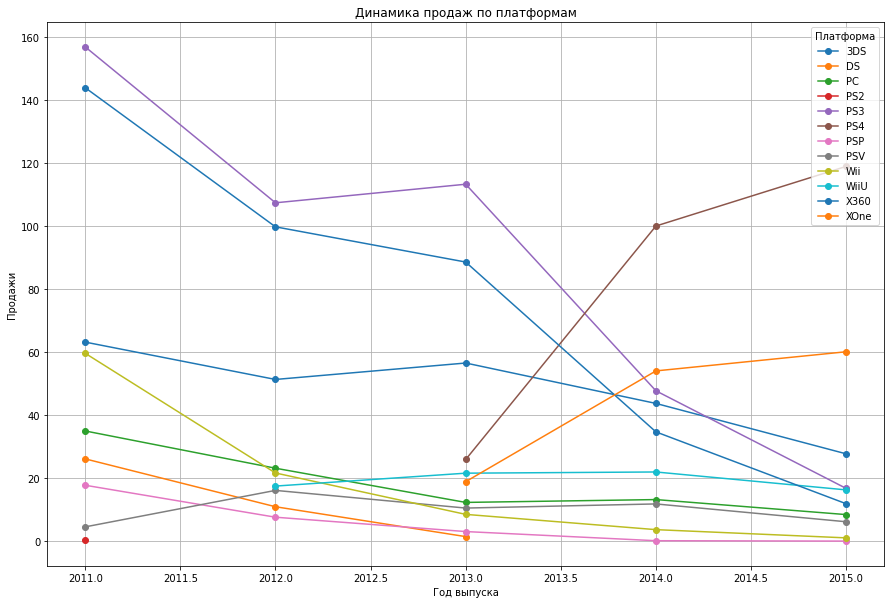

In [26]:
platforms = data_actual.groupby('platform')
plt.figure(figsize=(15, 10))

for platform, group in platforms:
    sales_year = group.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_year.index, sales_year.values, marker='o', label=platform)
    
plt.title('Динамика продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend(title='Платформа')

Из графика ясно, что платформы, которые появились давно, падают по продажам, в то время, как такие платформы как DC и XOne растут, и скорее всего, именно они будут прибыльными в 2017 году. Помимо них довольно стабильны продажи у PS3, хоть продажи и падают, они все равно выше, чем у других. 


(0.01, 15.0)

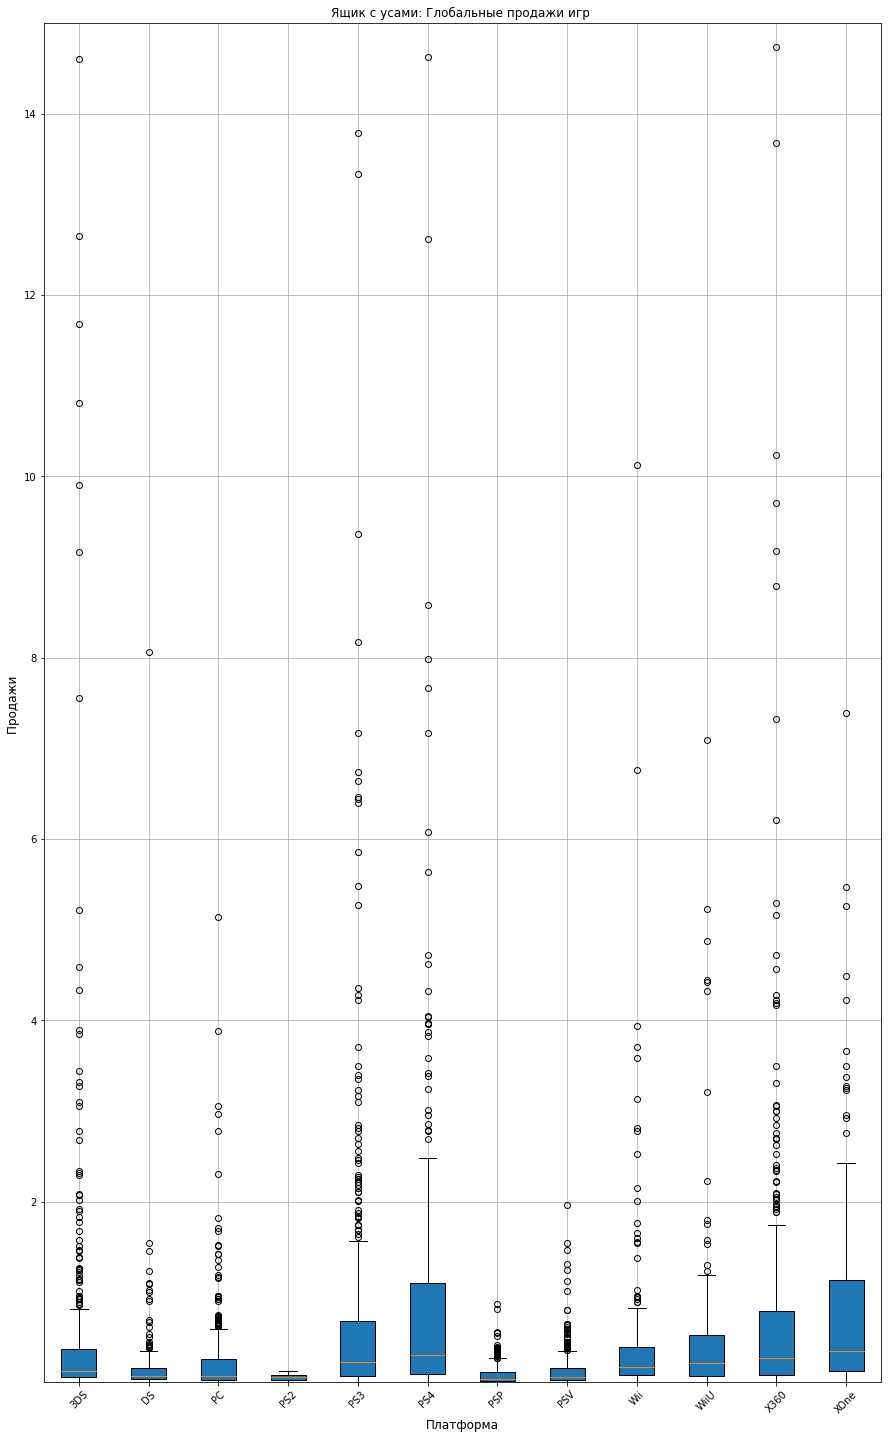

In [27]:
sales_data = []
platform_labels = []

for platform, group in platforms:
    platform_sales = group['total_sales']
    sales_data.append(platform_sales.values)
    platform_labels.append(platform)

plt.figure(figsize=(15, 25))
plt.boxplot(sales_data, vert=True, patch_artist=True, showfliers=True)
plt.title('Ящик с усами: Глобальные продажи игр ')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи ', fontsize=12)
plt.grid(True)
plt.xticks(ticks=range(1, len(platform_labels) + 1), labels=platform_labels, rotation=45)
plt.ylim(0.01, 15)  


(0.01, 4.0)

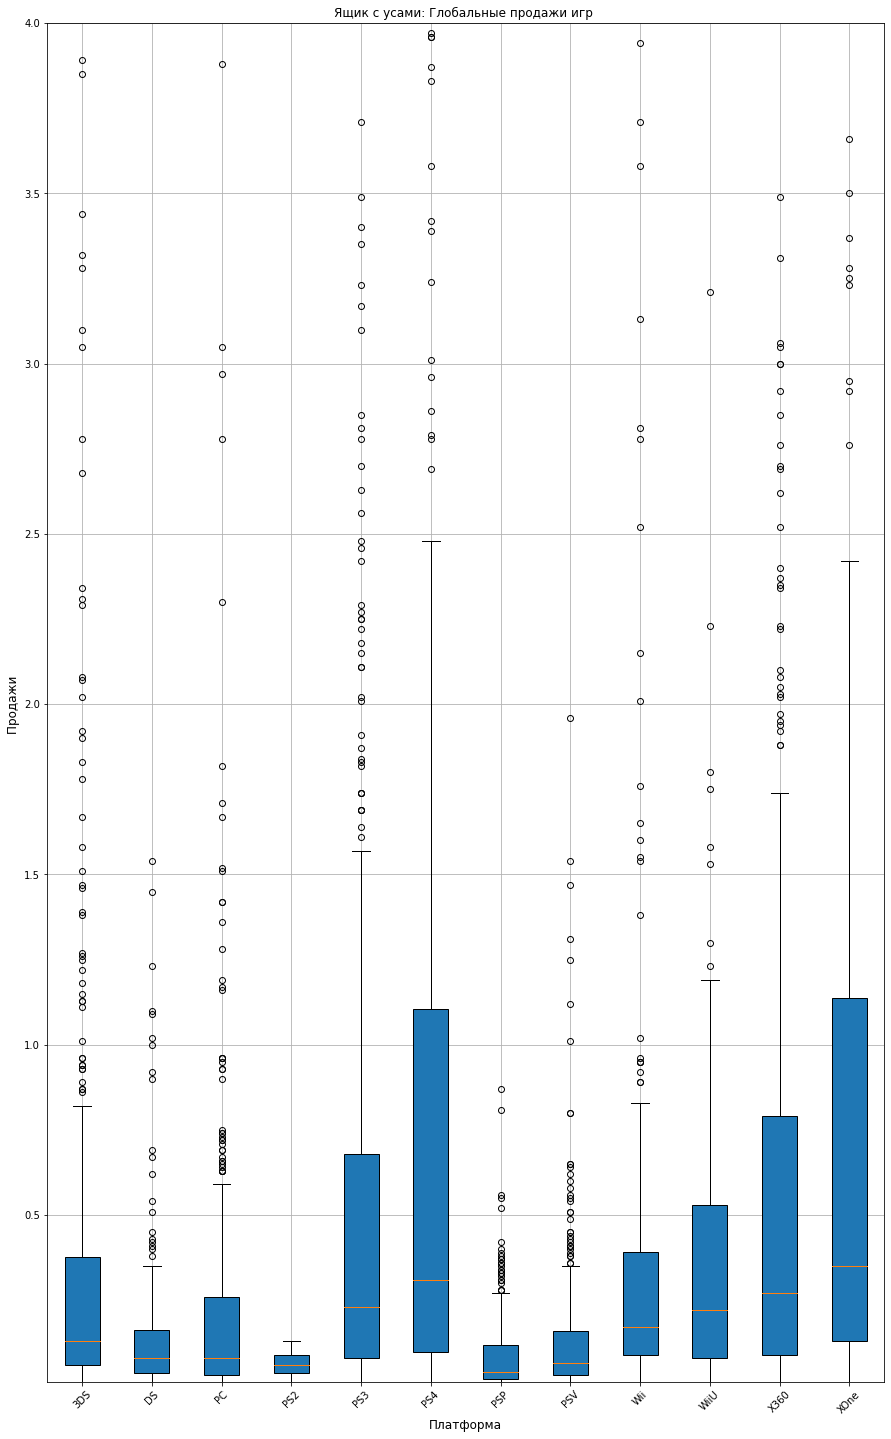

In [28]:
sales_data = []
platform_labels = []

for platform, group in platforms:
    platform_sales = group['total_sales']
    sales_data.append(platform_sales.values)
    platform_labels.append(platform)

plt.figure(figsize=(15, 25))
plt.boxplot(sales_data, vert=True, patch_artist=True, showfliers=True)
plt.title('Ящик с усами: Глобальные продажи игр ')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи ', fontsize=12)
plt.grid(True)
plt.xticks(ticks=range(1, len(platform_labels) + 1), labels=platform_labels, rotation=45)
plt.ylim(0.01, 4)  


Самые высокие медианы продаж наблюдаются у платформ PS4, XOne, X360, PS3. Также у платформ X360, PS3, Wii, DS, PS2, PSP много выбросов в большую сторону продаж, что говорит нам о наличии хитов у этих платформ. Так, указанные платформы являются лидерами продаж в 2006–2015 годах. 
DC, GB, GBA, PC, XB, PSP, PSV имеют низкие медианные продажи  и мало выбросов, что говорит о низкой популярности в 2006–2015 годах.


Рассмотрим, как влияют на продажи отзывы пользователей и критиков на примере PS4, XOne, X360, поскольку они довольно популярны и перспективны, а также показали высокое медианное значение. Для этого сначала удалим строки с пропусками в данных, чтобы не возникло ошибки. 

In [29]:
ps4_data = data_actual.query('platform=="PS4"')
ps4_data = ps4_data.dropna(subset=['total_sales', 'critic_score', 'user_score'])
ps4_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,6.1,T,5.64
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80,6.3,M,4.05
298,Far Cry 4,PS4,2014,Shooter,1.13,2.18,0.10,0.63,85,7.7,M,4.04
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92,9.2,M,3.97


In [30]:
XOne_data = data_actual.query('platform=="XOne"')
XOne_data = XOne_data.dropna(subset=['total_sales', 'critic_score', 'user_score'])
XOne_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75,5.5,T,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82,7.5,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84,4.4,E,3.25
422,Halo: The Master Chief Collection,XOne,2014,Shooter,1.91,1.00,0.03,0.29,85,7.2,M,3.23
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86,6.4,M,2.95


In [31]:
X360_data = data_actual.query('platform=="X360"')
X360_data = X360_data.dropna(subset=['total_sales', 'critic_score', 'user_score'])
X360_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87,7,M,9.71
75,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,5.05,2.79,0.10,0.85,96,8.4,M,8.79
101,Battlefield 3,X360,2011,Shooter,4.46,2.11,0.06,0.69,84,7.4,M,7.32
140,Gears of War 3,X360,2011,Shooter,4.05,1.59,0.07,0.50,91,7.8,M,6.21
176,Assassin's Creed III,X360,2012,Action,3.13,1.69,0.03,0.44,84,6.7,M,5.29
190,FIFA Soccer 13,X360,2012,Action,1.09,3.47,0.03,0.57,90,6.1,E,5.16


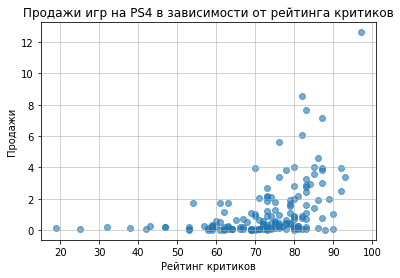

In [32]:
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.6)
plt.title('Продажи игр на PS4 в зависимости от рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.grid(True, alpha=0.7)

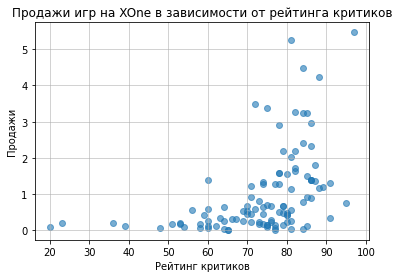

In [33]:
plt.scatter(XOne_data['critic_score'], XOne_data['total_sales'], alpha=0.6)
plt.title('Продажи игр на XOne в зависимости от рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.grid(True, alpha=0.7)

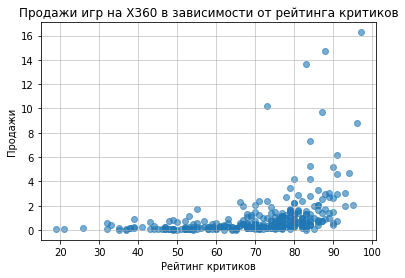

In [34]:
plt.scatter(X360_data['critic_score'], X360_data['total_sales'], alpha=0.6)
plt.title('Продажи игр на X360 в зависимости от рейтинга критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.grid(True, alpha=0.7)

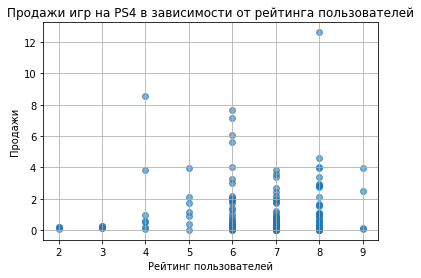

In [35]:
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'])
ps4_data['user_score_rounded'] = ps4_data['user_score'].round(0).astype(int)
plt.scatter(ps4_data['user_score_rounded'], ps4_data['total_sales'], alpha=0.6)
plt.title('Продажи игр на PS4 в зависимости от рейтинга пользователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.grid(True)

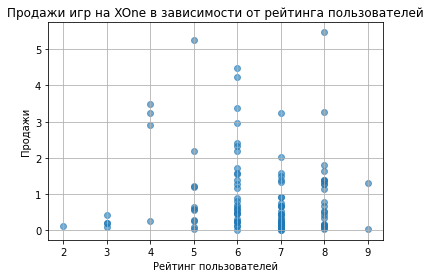

In [36]:
XOne_data['user_score'] = pd.to_numeric(XOne_data['user_score'])
XOne_data['user_score_rounded'] = XOne_data['user_score'].round(0).astype(int)
plt.scatter(XOne_data['user_score_rounded'], XOne_data['total_sales'], alpha=0.6)
plt.title('Продажи игр на XOne в зависимости от рейтинга пользователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.grid(True)

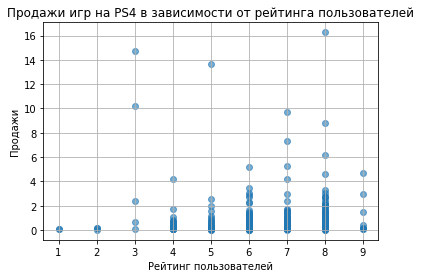

In [37]:
X360_data['user_score'] = pd.to_numeric(X360_data['user_score'])
X360_data['user_score_rounded'] = X360_data['user_score'].round(0).astype(int)
plt.scatter(X360_data['user_score_rounded'], X360_data['total_sales'], alpha=0.6)
plt.title('Продажи игр на PS4 в зависимости от рейтинга пользователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.grid(True)

In [38]:
total_sales = ps4_data['total_sales'].astype(float).values
critic_score = ps4_data['critic_score'].astype(float).values
np.corrcoef(total_sales, critic_score)[0, 1]

0.43077683172975184

In [39]:
total_sales = XOne_data['total_sales'].astype(float).values
critic_score = XOne_data['critic_score'].astype(float).values
np.corrcoef(total_sales, critic_score)[0, 1]

0.45135977879464817

In [40]:
total_sales = X360_data['total_sales'].astype(float).values
critic_score = X360_data['critic_score'].astype(float).values
np.corrcoef(total_sales, critic_score)[0, 1]

0.3903969695010255

In [41]:
ps4_data['total_sales'].corr(ps4_data['user_score'])

0.018139495872710115

In [42]:
XOne_data['total_sales'].corr(XOne_data['user_score'])

-0.05124338998440079

In [43]:
X360_data['total_sales'].corr(X360_data['user_score'])

0.02411054268508378

Оценка пользователей влияет на продажи, но не сильно, корреляция между отзывами и продажами довольно низкая, но все же по диаграммам у рассеяния видно, что больше продаж приносят игры с рейтингом выше половины. Однако, корреляция рейтинга критиков и размера продаж довольно высокая, значит этот параметр значительно влияет на доходность платформы. 

Рассмотрим общее распределение игр по жанрам и как они влияют на прибыль. 

In [44]:
data_actual['genre'].value_counts()

Action          1091
Role-Playing     411
Adventure        354
Misc             343
Sports           341
Shooter          282
Racing           156
Fighting         143
Simulation       118
Platform         107
Strategy         104
Puzzle            70
Name: genre, dtype: int64

Text(0, 0.5, 'Количество игр')

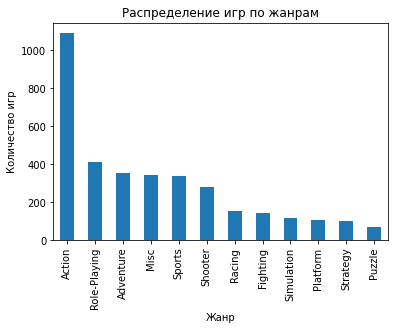

In [45]:
data_actual['genre'].value_counts().plot(kind='bar')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')

In [46]:
data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          527.69
Shooter         364.69
Role-Playing    227.45
Sports          213.66
Misc            136.82
Racing           85.52
Platform         85.45
Fighting         62.43
Simulation       48.37
Adventure        41.22
Strategy         21.03
Puzzle            9.84
Name: total_sales, dtype: float64

Text(0, 0.5, 'Жанр')

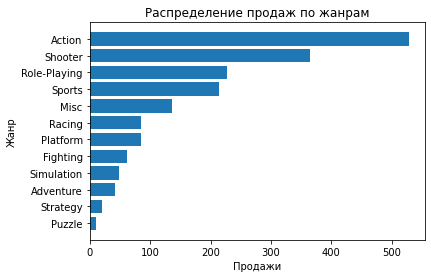

In [47]:
sales_by_genre = data_actual.groupby('genre')['total_sales'].sum().sort_values()
plt.barh(sales_by_genre.index, sales_by_genre.values)
plt.title('Распределение продаж по жанрам')
plt.xlabel('Продажи')
plt.ylabel('Жанр')

In [48]:
data_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.440
Platform        0.240
Sports          0.210
Fighting        0.190
Racing          0.170
Role-Playing    0.160
Action          0.150
Misc            0.150
Simulation      0.125
Strategy        0.080
Puzzle          0.050
Adventure       0.040
Name: total_sales, dtype: float64

In [49]:
data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.293227
Platform        0.798598
Sports          0.626569
Role-Playing    0.553406
Racing          0.548205
Action          0.483676
Fighting        0.436573
Simulation      0.409915
Misc            0.398892
Strategy        0.202212
Puzzle          0.140571
Adventure       0.116441
Name: total_sales, dtype: float64

Самыми популярными и самыми прибыльными оказались одни и те же жанры (action, sports). Это связано с тем, что такие игры обычно более динамичны, что привлекает пользователей. И наоборот, наименеее прибыльными и популярными являются такие жанры, как пазлы, в которых все спокойно и размерено. Однако, более стабильно продаются Shooter и Platform, их среднее и медиана, выше чем у всех остальных, значит может оказаться более выгодным именно их продажа и популяризация. 

Так, мы провели анализ как влияют на продажи и популярность игр год выпуска, отзывы, а также жанр. Больше всего на это влияет год выпуска и жанр, оценки пользователей и критиков также оказывают влияние, но в меньшей степени. Это связано с тем, что многие выбирают по картинке и сюжету, хотят попробовать что-то новое, не вдаваясь в подробности мнения других людей. 

<b>Шаг 4. Портрет пользователя каждого региона</b>

In [50]:
total_na_sales = data_actual['na_sales'].sum()
total_eu_sales = data_actual['eu_sales'].sum()
total_jp_sales = data_actual['jp_sales'].sum()

In [51]:
(data_actual.groupby('platform')['na_sales'].sum() / total_na_sales * 100).sort_values(ascending=False).head(5)

platform
X360    28.810061
PS3     21.353669
PS4     11.117057
XOne    10.046762
3DS     10.003440
Name: na_sales, dtype: float64

In [52]:
(data_actual.groupby('platform')['eu_sales'].sum() / total_eu_sales * 100).sort_values(ascending=False).head(5)

platform
PS3     26.163571
X360    18.815979
PS4     17.671403
3DS      9.528428
PC       8.595632
Name: eu_sales, dtype: float64

In [53]:
(data_actual.groupby('platform')['jp_sales'].sum() / total_jp_sales * 100).sort_values(ascending=False).head(5)

platform
3DS     40.907484
PS3     21.246797
PSP     10.621189
PSV      8.076345
WiiU     5.451975
Name: jp_sales, dtype: float64

В топ 5 платформ по продажам в каждом регионе вошли PS3, DS, но в каждом регионе занимают разное место в рейтинге. В северной Америке самыми прибыльными платформами оказались PS3, X360, Wii, DS, PS2
В Европе: PS3, X360, Wii, DS, PS4
В Японии: DS, 3DS, PS3, PSP, Wii

Скорее всего разница доли продаж в разных регионах обусловлена доступностью платформ в конкретных местах, а также удобством способа оплаты. 

Рассмотрим самые популярные жанры по регионам

In [54]:
data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          221.63
Shooter         178.19
Sports          101.16
Role-Playing     77.89
Misc             68.93
Name: na_sales, dtype: float64

In [55]:
data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          188.44
Shooter         132.12
Sports           76.47
Role-Playing     58.02
Misc             39.06
Name: eu_sales, dtype: float64

In [56]:
data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    73.26
Action          56.55
Misc            16.56
Platform        12.02
Fighting        11.63
Name: jp_sales, dtype: float64

В северной Америке и Европе топ-5 жанров практически не отличаются: первые 4 строчки занимают action, sports, shooter, misc, только 5 место не совпадает: Role-Playing и Racing соответсвенно. Это связано со схожестью культурных ценностей и привычек людей из этих регионов. В Японии самыми популярными жанрами по убыванию являются: Role-Playing, action, misc, sports, platform. Сами жанры в топе не сильно отличаются, но по разному распределены в рейтинге. Это говорит нам о том, что в Японии обычаи людей отличаются от северо-американских и европейских. 

In [57]:
data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M       292.78
E       162.20
E10+    113.91
T       100.36
EC        0.42
RP        0.00
Name: na_sales, dtype: float64

In [58]:
data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M       233.72
E       128.12
E10+     74.19
T        73.37
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

In [59]:
data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
E       35.61
T       31.12
M       24.94
E10+    10.78
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64

Рейтинг ESRB явно влияет на продажи, примерно одинаково во всех регионах, в северной Америке и Японии абсолютно идентичны, а в Европе последние две строки топа поставлены наоборот. Значит, влияние рейтинга ESRB на продажи не сильно зависит от региона. 

Мы рассмотрели портрет пользователя для каждого региона. Выяснилось, что в регионах много схожостей(во влиянии рейтинга на продажи и самые популярные жанры), обусловленных такими факторами, как схожесть культурных ценностей и обычаев. Но самые прибыльные платформы различаются, это может быть связано с использованием платформы на определенной местности, где-то они могут быть недоступны, или предоставляются менее удобные способы оплаты. 

<b>Шаг 5. Проверка гипотез</b>

Выясним различаются ли средние пользовательские рейтинги платформ Xbox One и PC. Для этого сформулируем нулевую и альтернативную гипотезы соответсвенно:
- Средние пользовательские рейтинги платформ Xbox One и PC равны
- Средние пользовательские рейтинги платформ Xbox One и PC различаются

Именно такая формулировка гипотез позволит нам ответить на поставленный вопрос. 

Для проверки гипотез будем использовать метод для проверки равенства средних двух генеральных совокупностей scipy.stats.ttest_ind с параметром alternative='two-sided', который стоит по умолчанию. Примем значение альфа за 0.01

In [60]:
results = st.ttest_ind(pd.to_numeric(data_actual[data_actual['platform'] == 'XOne']['user_score']).dropna(), pd.to_numeric(data_actual[data_actual['platform'] == 'PC']['user_score']).dropna())
results.pvalue

0.9968723176117981

p-значение слишком маленькое и меньше выбранного альфа, значит мы отвергаем нулевую гипотезу и делаем вывод о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.


Выясним различаются ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»). Для этого сформулируем нулевую и альтернативную гипотезы соответсвенно:
- Средние пользовательские рейтинги жанров Action и Sports равны
- Средние пользовательские рейтинги жанров Action и Sports разные

Именно такая формулировка гипотез позволит нам ответить на поставленный вопрос. 

Для проверки гипотез будем использовать метод для проверки равенства средних двух генеральных совокупностей scipy.stats.ttest_ind с параметром alternative='two-sided', который стоит по умолчанию. Примем значение альфа за 0.01

In [61]:
results = st.ttest_ind(pd.to_numeric(data_actual[data_actual['genre'] == 'Action']['user_score']).dropna(), pd.to_numeric(data_actual[data_actual['genre'] == 'Sports']['user_score']).dropna())
results.pvalue

4.4287702630764084e-21

p-значение меньше выбранного альфа, значит мы отвергаем нулевую гипотезу и делаем вывод о том, что средние пользовательские рейтинги жанров Action и Sports разные. 

Так, средние пользовательские рейтинги отличаются и в жанрах action, sports, и в платформах XOne, PC. 

<b>Общий вывод</b>

В рамках анализа данных о видеоиграх мы изучили датасет, содержащий информацию о продажах, пользовательских и  рейтингах критиков, жанрах, платформах и возрастных рейтингах ESRB за период до 2016 года включительно. В данных были пропуски, которые мы обработали в первом шаге, а также был изменен формат некоторых данных и добавлен столбец для суммы продаж по всем регионам. 

В результате исследовательского анализа оказалось, что средняя продолжительность работы платформы составляет 5 лет, каждые 5-7 появляются новые, значит при планировании кампании на 2017 год надо опираться на более свежие платформы. Самыми популярными и  прибыльными оказались жанры action и sports за счет своей динамичности, что привлекает пользователей. Сильнее на популярность и прибыльность влияют год выпуска, оценка критиков и жанр, оценки пользователей также оказывают влияние, но в меньшей степени. 

Были исследованы пользователи по регионам. Оказалось, что в регионах много схожостей, обусловленных такими факторами, как схожесть культурных ценностей и обычаев, так в северной Америке и Европе пользователи отдают предпочтение одинаковым жанрам. Однако, самые прибыльные платформы различаются, это может быть обусловлено разными способами оплаты или поддержания работы платформ в определенных странах. 

С помощью проверки гипотез выяснилось, что средние пользовательские рейтинги отличаются в жанрах action, sports, и в платформах XOne, PC. 

